In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('output_final.csv',skipinitialspace=True)

In [4]:
df.sample(3)

,Name,Condition,Price,Location,Link,Car_code
2446,Ford Everest 2.5L 4x2 MT - 2007,Xe cũ,168 Triệu,Hà Nội,xe-ford-everest-2.5l-4x2-mt-2007-4514635,Mã: 4514635
17735,Toyota Innova 2.0E - 2015,Xe cũ,395 Triệu,Lâm Đồng,xe-toyota-innova-2.0e-2015-4444266,Mã: 4444266
25681,Audi Q5 2.0 AT - 2018,Xe cũ,1 Tỷ 769 Triệu,Hà Nội,xe-audi-q5-2.0-at-2018-4480039,Mã: 4480039


## Year and Name element extraction and classify car brand

In [5]:
new = df['Name'].str.split("-",n=1,expand=True)
df['Year'] = new[1]
df['Car'] = new[0]
df.drop(columns=['Name'],inplace=True)

df['Final_link'] = "bonbanh.com/" + df['Link']
df.drop(columns=['Link'],inplace=True)

In [6]:
df.sample(3)

,Condition,Price,Location,Car_code,Year,Car,Final_link
1733,Xe cũ,780 Triệu,TP HCM,Mã: 4404942,2008,Mercedes Benz GL GL 320 CDI 4Matic,bonbanh.com/xe-mercedes_benz-gl-gl-320-cdi-4ma...
19210,Xe cũ,305 Triệu,Phú Thọ,Mã: 4248924,2013,Hyundai Avante 1.6 MT,bonbanh.com/xe-hyundai-avante-1.6-mt-2013-4248924
21609,Xe cũ,185 Triệu,TP HCM,Mã: 4346867,2004,Toyota Zace GL,bonbanh.com/xe-toyota-zace-gl-2004-4346867


In [7]:
def car_classified(name):
    if 'Kia' in name:
        result = 'Kia'
    elif 'Toyota' in name:
        result = 'Toyota'
    elif 'Lexus' in name:
        result = 'Lexus'
    elif 'Volkswagen' in name:
        result = 'Toyota'
    elif 'BMW' in name:
        result = 'BMW'
    elif 'Rolls Royce' in name:
        result = 'Rolls Royce'
    elif 'Honda' in name:
        result = 'Honda'
    elif 'Ford' in name:
        result = 'Ford'
    elif 'Hyundai' in name:
        result = 'Hyundai'
    elif 'Nissan' in name:
        result = 'Nissan'
    elif 'Peugeot' in name:
        result = 'Peugeot'
    elif 'Suzuki' in name:
        result = 'Suzuki'
    elif 'Mercedes' in name:
        result = 'Mercedes Benz'
    elif 'Chevrolet' in name:
        result = 'Chevrolet'
    elif 'Mazda' in name:
        result = 'Mazda'
    elif 'Range Rover' in name:
        result = 'Range Rover'
    elif 'Mitsubishi' in name:
        result = 'Mitsubishi'
    elif 'VinFast' in name:
        result = 'VinFast'
    elif 'Porsche' in name:
        result = 'Porsche'
    elif 'Jaguar' in name:
        result = 'Jaguar'
    elif 'Volvo' in name:
        result = 'Volvo'
    elif 'Audi' in name:
        result = 'Audi'
    elif 'Bentley' in name:
        result = 'Bentley'
    elif 'Lamborghini' in name:
        result = 'Lamborghini'
    elif 'Ferrari' in name:
        result = 'Ferrari'
    else:
        result = 'Others'
    return result
df['Brand'] = df['Car'].apply(car_classified)

Most popular car brands

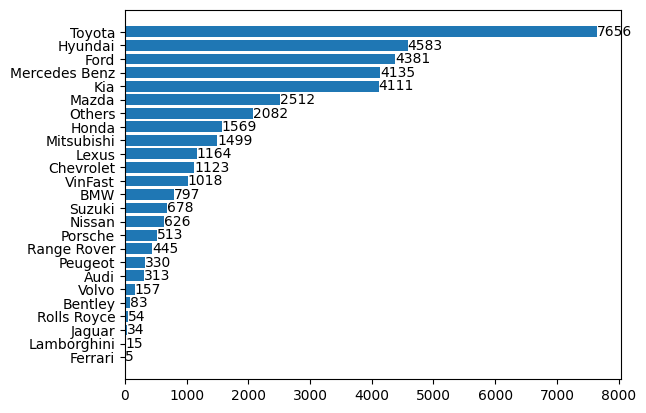

<Figure size 2000x1500 with 0 Axes>

In [8]:
number_ranking = df.groupby(df.Brand).size().sort_values(ascending=True)
d2 = number_ranking.to_frame(name='Count').reset_index()
fig, ax = plt.subplots()

bars = ax.barh(d2['Brand'], d2['Count'])
ax.bar_label(bars)
plt.figure(figsize=(20,15))
plt.show()

## Convert "Triệu" and "Tỷ" into 10^6 and 10^9 

In [9]:
def convert2pirce(text):
    if 'Tỷ' in text:
        num_bil = text.split(' Tỷ')[0]
        price = int(num_bil)*10e8 
        if 'Triệu' in text:
            num_mil = text.split(' Tỷ ')[1].split(' ')[0]
            price += int(num_mil)*10e5
        return str(price)
    else:
        return str(int(text.split(' ')[0])*10e5)

In [10]:
df['Price'] = df['Price'].apply(lambda x: f'{float(convert2pirce(x)):.3f}')

In [11]:
df.Price

0         9300000000.000
1         9999000000.000
2         4300000000.000
3        13900000000.000
4         4300000000.000
              ...       
39878       55000000.000
39879      220000000.000
39880      365000000.000
39881      385000000.000
39882      155000000.000
Name: Price, Length: 39883, dtype: object

In [12]:
#Remove dot 
df['Price'] = df['Price'].str.split(".", n=1).str[0]
df['Price'] = df['Price'].astype(float)

## How many old and new cars on the market

In [13]:
df.groupby('Condition').size()

Condition
Xe cũ     30458
Xe mới     9425
dtype: int64

## Convert PRICE to USD (1usd = 23.385vnd) and do analysis

In [14]:
df2 = df.copy()
df2.Price = df2.Price / 23675
df2[['Car','Price']].sample(3)

,Car,Price
26136,Ford Ranger XLS 2.2L 4x2 AT,27961.985216
10882,Chevrolet Spark Van 1.0 AT,6673.706441
19683,Kia Sedona 3.3L GATH,28722.280887


In [15]:
df2['Price'] = df2['Price'].round()

#Rename the column
df2['Price (USD)']  = df2['Price'] 

df2.drop('Price',axis=1,inplace=True) 

In [16]:
df2.sample(3)

,Condition,Location,Car_code,Year,Car,Final_link,Brand,Price (USD)
28933,Xe cũ,Hà Nội,Mã: 4438542,2003,Ford Laser GHIA 1.8 MT,bonbanh.com/xe-ford-laser-ghia-1.8-mt-2003-443...,Ford,5069.0
17571,Xe cũ,Bắc Ninh,Mã: 4417062,2016,Toyota Camry 2.5Q,bonbanh.com/xe-toyota-camry-2.5q-2016-4417062,Toyota,32524.0
23516,Xe cũ,Hà Nội,Mã: 4491777,2021,Mercedes Benz E class E180,bonbanh.com/xe-mercedes_benz-e_class-e180-2021...,Mercedes Benz,80211.0


## Calculate AVERAGE price of each car brand

In [17]:
d3 = df2.groupby('Brand')['Price (USD)'].mean().to_frame(name='Average price').reset_index()
d3['Average price']  = d3['Average price'].apply(lambda x: '%.2f' %x)
d3['Average price'] = d3['Average price'].astype(float)

Top 5 most expensive car brand

In [18]:
d3.nlargest(5,'Average price')

,Brand,Average price
20,Rolls Royce,1010838.28
10,Lamborghini,819139.67
2,Bentley,463840.96
4,Ferrari,330728.60
18,Porsche,191606.38


Average price by car brand

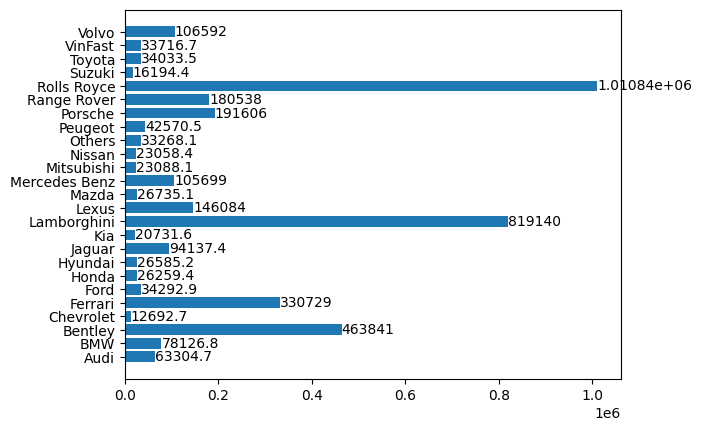

<Figure size 2000x1500 with 0 Axes>

In [19]:
fig, ax = plt.subplots()

bars = ax.barh(d3['Brand'], d3['Average price'])
ax.bar_label(bars)
plt.figure(figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Price (USD)', ylabel='Brand'>

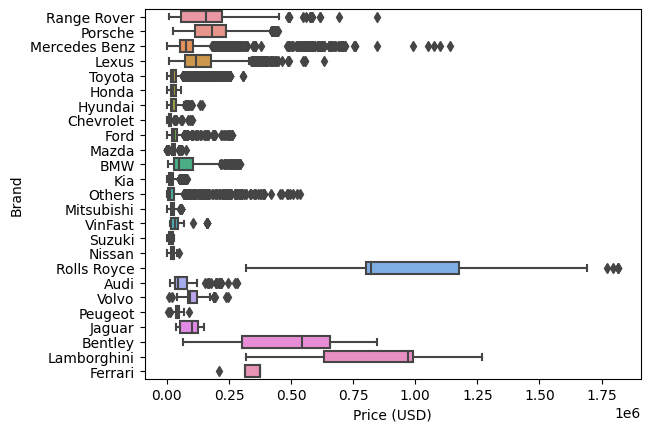

In [20]:
import seaborn as sns 

sns.boxplot(data=df2, x="Price (USD)", y="Brand")

## Top 10 most popular cars 

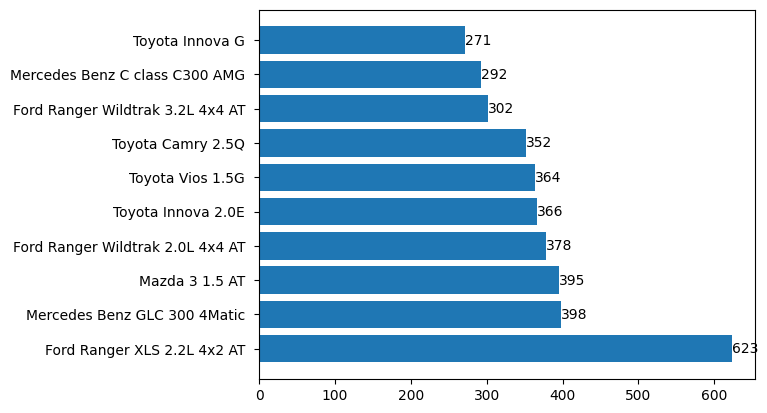

<Figure size 2000x1500 with 0 Axes>

In [21]:
popular_cars = df2.groupby('Car').size().sort_values(ascending=True).to_frame('Number').reset_index()
popular_cars_vsl  = popular_cars.nlargest(10,'Number')

fig, ax = plt.subplots()

bars = ax.barh(popular_cars_vsl['Car'], popular_cars_vsl['Number'])
ax.bar_label(bars)
plt.figure(figsize=(20,15))
plt.show()

In [22]:
d4 = popular_cars.sort_values(by=['Number'],ascending=False).head(10)
list_car = list(d4['Car'])
df3 = df2.copy()

In [23]:
list_car

['Ford Ranger XLS 2.2L 4x2 AT ',
 'Mercedes Benz GLC 300 4Matic ',
 'Mazda 3 1.5 AT ',
 'Ford Ranger Wildtrak 2.0L 4x4 AT ',
 'Toyota Innova 2.0E ',
 'Toyota Vios 1.5G ',
 'Toyota Camry 2.5Q ',
 'Ford Ranger Wildtrak 3.2L 4x4 AT ',
 'Mercedes Benz C class C300 AMG ',
 'Toyota Innova G ']

Average price of top 10 most popular cars in Vietnam

In [24]:
round(df3[df3['Car'].isin(list_car)].groupby('Car')['Price (USD)'].mean())

Car
Ford Ranger Wildtrak 2.0L 4x4 AT     37599.0
Ford Ranger Wildtrak 3.2L 4x4 AT     31506.0
Ford Ranger XLS 2.2L 4x2 AT          26620.0
Mazda 3 1.5 AT                       22050.0
Mercedes Benz C class C300 AMG       64535.0
Mercedes Benz GLC 300 4Matic         90574.0
Toyota Camry 2.5Q                    45699.0
Toyota Innova 2.0E                   20261.0
Toyota Innova G                      10704.0
Toyota Vios 1.5G                     19147.0
Name: Price (USD), dtype: float64

## Geography

In [25]:
df3.Location.unique()

array(['TP HCM', 'Lâm Đồng', 'Hà Nội', 'Ninh Bình', 'Bắc Ninh',
       'Bình Dương', 'Hậu Giang', 'Phú Thọ', 'Thanh Hóa', 'Long An',
       'Hải Phòng', 'Quảng Ninh', 'Bắc Giang', 'Khánh Hòa', 'Đồng Nai',
       'Cần Thơ', 'Vĩnh Phúc', 'Bình Định', 'Lạng Sơn', 'An Giang',
       'Hải Dương', 'Thái Nguyên', 'Nghệ An', 'Tiền Giang', 'Nam Định',
       'Đồng Tháp', 'Đăk Lăk', 'Bà Rịa Vũng Tàu', 'Kiên Giang', 'Gia Lai',
       'Thái Bình', 'Đà Nẵng', 'Hưng Yên', 'Hà Nam', 'Hòa Bình',
       'Phú Yên', 'Bình Thuận', 'Kon Tum', 'Tây Ninh', 'Quảng Ngãi',
       'Quảng Trị', 'Tuyên Quang', 'Sơn La', 'Ninh Thuận', 'Hà Giang',
       'Bình Phước', 'Điện Biên', 'Quảng Bình', 'Lào Cai', 'Lai Châu',
       'Cà Mau', 'Yên Bái', 'Quảng Nam', 'Đăk Nông', 'Hà Tĩnh',
       'Thừa Thiên Huế', 'Vĩnh Long', 'Sóc Trăng', 'Cao Bằng', 'Bạc Liêu',
       'Bến Tre', 'Bắc Kạn', 'Trà Vinh'], dtype=object)

In [26]:
df3.groupby('Location').size().sort_values(ascending=False)

Location
Hà Nội        19025
TP HCM         8146
Hải Phòng      1163
Bình Dương      882
Đăk Lăk         727
              ...  
Hậu Giang        14
Vĩnh Long        11
Lai Châu         10
Trà Vinh          8
Bạc Liêu          3
Length: 63, dtype: int64

## What are the most expensive cars?

In [27]:
d5 = df3.sort_values(by=['Price (USD)'], ascending=False)

In [28]:
d5.head(5) #Top 5 most expensive car

,Condition,Location,Car_code,Year,Car,Final_link,Brand,Price (USD)
11237,Xe mới,Hà Nội,Mã: 4234748,2022,Rolls Royce Cullinan Black Badge,bonbanh.com/xe-rolls_royce-cullinan-black-badg...,Rolls Royce,1816262.0
5404,Xe mới,Hà Nội,Mã: 4471155,2021,Rolls Royce Cullinan Black Badge,bonbanh.com/xe-rolls_royce-cullinan-black-badg...,Rolls Royce,1816262.0
22299,Xe mới,Hà Nội,Mã: 4269258,2022,Rolls Royce Cullinan Black Badge,bonbanh.com/xe-rolls_royce-cullinan-black--bad...,Rolls Royce,1815375.0
14876,Xe cũ,Hà Nội,Mã: 4479164,2021,Rolls Royce Ghost Series II EWB,bonbanh.com/xe-rolls_royce-ghost-series-ii-ewb...,Rolls Royce,1795143.0
20768,Xe cũ,Hà Nội,Mã: 4408913,2018,Rolls Royce Cullinan 6.75 V12,bonbanh.com/xe-rolls_royce-cullinan-6.75-v12-2...,Rolls Royce,1773601.0


In [ ]:
df3[(df3['Condition']=='Xe cũ') & (df3['Price (USD)'].between(30000,50000)) & (df3['Brand']=='Honda')]

In [39]:
list(pd.unique(df3['Location']))

['TP HCM',
 'Lâm Đồng',
 'Hà Nội',
 'Ninh Bình',
 'Bắc Ninh',
 'Bình Dương',
 'Hậu Giang',
 'Phú Thọ',
 'Thanh Hóa',
 'Long An',
 'Hải Phòng',
 'Quảng Ninh',
 'Bắc Giang',
 'Khánh Hòa',
 'Đồng Nai',
 'Cần Thơ',
 'Vĩnh Phúc',
 'Bình Định',
 'Lạng Sơn',
 'An Giang',
 'Hải Dương',
 'Thái Nguyên',
 'Nghệ An',
 'Tiền Giang',
 'Nam Định',
 'Đồng Tháp',
 'Đăk Lăk',
 'Bà Rịa Vũng Tàu',
 'Kiên Giang',
 'Gia Lai',
 'Thái Bình',
 'Đà Nẵng',
 'Hưng Yên',
 'Hà Nam',
 'Hòa Bình',
 'Phú Yên',
 'Bình Thuận',
 'Kon Tum',
 'Tây Ninh',
 'Quảng Ngãi',
 'Quảng Trị',
 'Tuyên Quang',
 'Sơn La',
 'Ninh Thuận',
 'Hà Giang',
 'Bình Phước',
 'Điện Biên',
 'Quảng Bình',
 'Lào Cai',
 'Lai Châu',
 'Cà Mau',
 'Yên Bái',
 'Quảng Nam',
 'Đăk Nông',
 'Hà Tĩnh',
 'Thừa Thiên Huế',
 'Vĩnh Long',
 'Sóc Trăng',
 'Cao Bằng',
 'Bạc Liêu',
 'Bến Tre',
 'Bắc Kạn',
 'Trà Vinh']

## Export dataframe

In [33]:
df3.to_csv('dataframe_app.csv',index=None)

## 